In [3]:
import pandas as pd

# Data Understanding

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/machineLearningTerapan/TheMoviesDataset.zip

Archive:  /content/drive/MyDrive/machineLearningTerapan/TheMoviesDataset.zip
  inflating: credits.csv             
  inflating: keywords.csv            
  inflating: links.csv               
  inflating: links_small.csv         
  inflating: movies_metadata.csv     
  inflating: ratings.csv             
  inflating: ratings_small.csv       


Kolom yang akan digunakan

*   title: judul film
*   cast: nama pemeran utama dan pemeran support
*   crew: nama direktor, editor, komposer, penulis dl
*   genres: genre dari film
*   homepage: link menuju ke website film
*   id: kode unik setiap film
*   keywords: kata kunci yang berkaitan dengan film
*   vote_average: rata-rata skor film
*   vote_count: jumlah voting yang diterima

##Data Movies

In [4]:
movies = pd.read_csv('/content/movies_metadata.csv')

<ipython-input-4-eea4e314f96a>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv('/content/movies_metadata.csv')


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [6]:
# menghapus data null pada kolom title
movies.dropna(subset=['title'], inplace=True)

In [7]:
movies['id'] = movies['id'].astype(int)

In [8]:
movies.head(1)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0


## Data Links

In [9]:
links = pd.read_csv('/content/links_small.csv')

In [10]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9125 non-null   int64  
 1   imdbId   9125 non-null   int64  
 2   tmdbId   9112 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 214.0 KB


In [11]:
#melakukan filter data null dan mengambil nilai dari tmdbId
links = links[links['tmdbId'].notnull()]
links = links['tmdbId'].astype('int')

In [12]:
links.head()

0      862
1     8844
2    15602
3    31357
4    11862
Name: tmdbId, dtype: int64

## Data Credits

In [13]:
credits = pd.read_csv('/content/credits.csv')

In [14]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [15]:
credits.head(2)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844


## Data Keywords

In [16]:
keywords = pd.read_csv('/content/keywords.csv')

In [17]:
keywords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


In [18]:
keywords.head(2)

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."


## Dataset gabungan

In [19]:
# membuat dataset gabungan
data = movies.merge(credits, on='id')
data = data.merge(keywords, on='id')
data = data[data['id'].isin(links)]
data.shape

(9219, 27)

#Sistem Rekomendasi dengan Content Based Filtering

##Data Preprocessing

In [27]:
import numpy as np
from ast import literal_eval
from nltk.stem import SnowballStemmer

In [28]:
data_prep = data.copy()

In [29]:
data_prep.head(1)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."


In [30]:
data_prep.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'cast', 'crew', 'keywords'],
      dtype='object')

### Kolom crew

hanya mengambil nama sutradara

In [31]:
print(data_prep['crew'].iloc[0])

[{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gender': 2, 'id': 7879, 'job': 'Director', 'name': 'John Lasseter', 'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'}, {'credit_id': '52fe4284c3a36847f8024f4f', 'department': 'Writing', 'gender': 2, 'id': 12891, 'job': 'Screenplay', 'name': 'Joss Whedon', 'profile_path': '/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg'}, {'credit_id': '52fe4284c3a36847f8024f55', 'department': 'Writing', 'gender': 2, 'id': 7, 'job': 'Screenplay', 'name': 'Andrew Stanton', 'profile_path': '/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg'}, {'credit_id': '52fe4284c3a36847f8024f5b', 'department': 'Writing', 'gender': 2, 'id': 12892, 'job': 'Screenplay', 'name': 'Joel Cohen', 'profile_path': '/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg'}, {'credit_id': '52fe4284c3a36847f8024f61', 'department': 'Writing', 'gender': 0, 'id': 12893, 'job': 'Screenplay', 'name': 'Alec Sokolow', 'profile_path': '/v79vlRYi94BZUQnkkyznbGUZLjT.jpg'}, {'credit_id': '52fe4284c3a36847f8024f67', 'depart

In [32]:
data_prep['crew'] = data_prep['crew'].apply(literal_eval)

In [33]:
# fungsi untuk mengambil nama sutradara
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [34]:
data_prep['director'] = data_prep['crew'].apply(get_director)

In [35]:
data_prep['director'].head(2)

0    John Lasseter
1     Joe Johnston
Name: director, dtype: object

menghilangkan spasi dan membuat nama sutradara 3 kali agar memiliki bobot yang sama dengan kolom cast

In [36]:
data_prep['director'] = data_prep['director'].astype('str').apply(lambda x: str.lower(x.replace(" ", "")))

In [37]:
data_prep['director'] = data_prep['director'].apply(lambda x: [x,x, x])

In [38]:
data_prep['director'].head(2)

0    [johnlasseter, johnlasseter, johnlasseter]
1       [joejohnston, joejohnston, joejohnston]
Name: director, dtype: object

###Kolom cast

mengambil maksimal 3 orang dari daftar pemeran

In [39]:
print(data_prep['cast'].iloc[0])

[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4tN

In [40]:
data_prep['cast'] = data_prep['cast'].apply(literal_eval)

In [41]:
# jka terdapat data mengambil 3 pemeran film, jika tidak []
data_prep['cast'] = data_prep['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
data_prep['cast'] = data_prep['cast'].apply(lambda x: x[:3] if len(x) >=3 else x)

In [42]:
data_prep['cast'].head(2)

0               [Tom Hanks, Tim Allen, Don Rickles]
1    [Robin Williams, Jonathan Hyde, Kirsten Dunst]
Name: cast, dtype: object

In [43]:
data_prep['cast'] = data_prep['cast'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

In [44]:
data_prep['cast'].head(2)

0               [tomhanks, timallen, donrickles]
1    [robinwilliams, jonathanhyde, kirstendunst]
Name: cast, dtype: object

### Kolom keywords

In [45]:
print(data_prep['keywords'].iloc[0])

[{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, 'name': 'boy'}, {'id': 6054, 'name': 'friendship'}, {'id': 9713, 'name': 'friends'}, {'id': 9823, 'name': 'rivalry'}, {'id': 165503, 'name': 'boy next door'}, {'id': 170722, 'name': 'new toy'}, {'id': 187065, 'name': 'toy comes to life'}]


In [46]:
data_prep['keywords'] = data_prep['keywords'].apply(literal_eval)

In [47]:
# jika ada data tampilkan, jika tidak []
data_prep['keywords'] = data_prep['keywords'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [48]:
#membuat objek baru berisikan daftar keywords
sample = data_prep.apply(lambda x: pd.Series(x['keywords']),axis=1).stack().reset_index(level=1, drop=True)
sample.name = 'keyword'

<ipython-input-48-e1052ebc29cf>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sample = data_prep.apply(lambda x: pd.Series(x['keywords']),axis=1).stack().reset_index(level=1, drop=True)


In [49]:
print(sample)

0           jealousy
0                toy
0                boy
0         friendship
0            friends
            ...     
41387    destruction
41387          kaiju
41387          toyko
41665          music
41665    documentary
Name: keyword, Length: 64407, dtype: object


In [50]:
# menghitung keywords yang sering muncul
sample = sample.value_counts()
sample[:10]

independent film        610
woman director          550
murder                  399
duringcreditsstinger    327
based on novel          318
violence                264
love                    222
musical                 219
sex                     219
suspense                212
Name: keyword, dtype: int64

In [51]:
# menghapus kyewords yang hanya muncul sekali
sample = sample[sample > 1]

In [52]:
# fungsi menyaring keywords sesuai keyword sample
def filter_keywords(x):
    words = []
    for i in x:
        if i in sample:
            words.append(i)
    return words

In [53]:
data_prep['keywords'] = data_prep['keywords'].apply(filter_keywords)

In [54]:
# mengubah keyword menjadi asal kata, jumping -> jump
stemmer = SnowballStemmer('english')
data_prep['keywords'] = data_prep['keywords'].apply(lambda x: [stemmer.stem(i) for i in x])

In [55]:
# menghilangkan spasi dan rata huruf kecil
data_prep['keywords'] = data_prep['keywords'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

### Kolom genres

In [56]:
#mengisi nilai null dengan[]
data_prep['genres'] = data_prep['genres'].fillna('[]')

In [57]:
data_prep['genres'] = data_prep['genres'].apply(literal_eval)

In [58]:
#menganbil nilai genres, jika tidak []
data_prep['genres'] = data_prep['genres'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

### Kolom baru

menambah kolom baru dari data keyword, cast, director dan genres

In [59]:
data_prep['info'] = data_prep['keywords'] + data_prep['cast'] + data_prep['director'] + data_prep['genres']
data_prep['info'] = data_prep['info'].apply(lambda x: ' '.join(x))

##TF-IDF Vectorizer

In [60]:
data_fix = data_prep.copy()

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')

# Melakukan perhitungan idf pada data info
tf.fit(data_fix['info'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['11', '11 jessicachastain', '11 thomashorn', ...,
       'эрикаэлениак penelopespheeris', '松隆子', '松隆子 masakiokada'],
      dtype=object)

In [62]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data_fix['info'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(9219, 107377)

In [63]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

##Cosine Similarity

In [64]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.00435893, 0.00179666, ..., 0.        , 0.        ,
        0.        ],
       [0.00435893, 1.        , 0.        , ..., 0.00415271, 0.00380583,
        0.        ],
       [0.00179666, 0.        , 1.        , ..., 0.00353317, 0.        ,
        0.        ],
       ...,
       [0.        , 0.00415271, 0.00353317, ..., 1.        , 0.01610418,
        0.        ],
       [0.        , 0.00380583, 0.        , ..., 0.01610418, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [65]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa title
cosine_sim_df = pd.DataFrame(cosine_sim, index=data_fix['title'], columns=data_fix['title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap film
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (9219, 9219)


title,The Dark Knight Rises,The Dogs of War,Eden Lake,Force Majeure,The Tall Blond Man with One Black Shoe
title,,,,,
The Railway Children,0.000841,0.000000,0.000000,0.001028,0.000000
The Staircase,0.000855,0.000000,0.000000,0.001046,0.000000
Don't Be a Menace to South Central While Drinking Your Juice in the Hood,0.000000,0.000000,0.000000,0.001292,0.001533
Martyrs,0.006963,0.015246,0.012718,0.000963,0.000000
The Terminal,0.000698,0.000000,0.000000,0.005601,0.001455
The Peacemaker,0.016112,0.005201,0.002129,0.000000,0.000000
Every Which Way But Loose,0.001782,0.010626,0.012719,0.001235,0.001465
As It Is in Heaven,0.000635,0.000000,0.000000,0.001891,0.001322
Serpico,0.009975,0.000000,0.000000,0.001270,0.000000


##Mendapatkan Rekomendasi

In [66]:
def movie_recommendations(title, similarity_data=cosine_sim_df, items=data_fix[['title']], k=10):

    index = similarity_data.loc[:,title].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(title, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [67]:
data_fix[data_fix.title.eq('Toy Story')]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,tagline,title,video,vote_average,vote_count,cast,crew,keywords,director,info
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,NaN,Toy Story,False,7.7,5415.0,"[tomhanks, timallen, donrickles]","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[jealousi, toy, boy, friendship, friend, rival...","[johnlasseter, johnlasseter, johnlasseter]",jealousi toy boy friendship friend rivalri boy...


In [68]:
# Mendapatkan rekomendasi film yang mirip dengan Toy Story
movie_recommendations('Toy Story')

,title
0,Luxo Jr.
1,Toy Story 2
2,Cars 2
3,Cars
4,A Bug's Life
5,Toy Story of Terror!
6,Toy Story 3
7,Hugo
8,The Lego Movie
9,Larry Crowne


#Rekomendasi berdasarkan Collaborative Filtering

## Data Understanding

In [103]:
# Import library
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [104]:
df = pd.read_csv('/content/ratings_small.csv')

In [105]:
df

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


##Data Preparation

In [72]:
# Mengubah movieId menjadi list tanpa nilai yang sama
movie_ids = df['movieId'].unique().tolist()

# Melakukan encoding movieId
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}

# Melakukan proses encoding angka ke ke movieId
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}

In [73]:
# Mapping movieId ke dataframe movie
df['movie'] = df['movieId'].map(movie_to_movie_encoded)

In [74]:
# Mendapatkan jumlah user
num_users = len(df['userId'])
print(num_users)

# Mendapatkan jumlah resto
num_movies = len(movie_to_movie_encoded)
print(num_movies)

# Mengubah rating menjadi nilai float
df['rating'] = df['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(df['rating'])

# Nilai maksimal rating
max_rating = max(df['rating'])

print('Number of User: {}, Number of movies: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movies, min_rating, max_rating
))

100004
9066
Number of User: 100004, Number of movies: 9066, Min Rating: 0.5, Max Rating: 5.0


##Membagi Data untuk Training dan Validasi

In [75]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,userId,movieId,rating,timestamp,movie
19090,128,1028,5.0,1049690908,165
99678,665,4736,1.0,1010197684,9064
18455,120,4002,3.0,1167420604,2763
35755,257,1274,4.0,1348544094,2190
66536,468,6440,4.0,1296191715,1333
...,...,...,...,...,...
6265,33,3911,5.0,1032769506,1098
54886,394,377,3.0,1298378869,64
76820,532,1347,3.5,1076971646,2199
860,12,3408,4.0,968045379,346


In [76]:
# Membuat variabel x untuk mencocokkan data user dan movies menjadi satu value
x = df[['userId', 'movieId']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 128 1028]
 [ 665 4736]
 [ 120 4002]
 ...
 [ 532 1347]
 [  12 3408]
 [ 102 2455]] [1.         0.11111111 0.55555556 ... 0.66666667 0.77777778 0.55555556]


##Proses Training

In [77]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_movies, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_resto = num_movies
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.resto_embedding = layers.Embedding( # layer embeddings resto
        num_movies,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movie_bias = layers.Embedding(num_movies, 1) # layer embedding resto bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    resto_vector = self.resto_embedding(inputs[:, 1]) # memanggil layer embedding 3
    movie_bias = self.movie_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_movie = tf.tensordot(user_vector, resto_vector, 2)

    x = dot_user_movie + user_bias + movie_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [94]:
model = RecommenderNet(num_users, num_movies, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [95]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 10,
    validation_data = (x_val, y_val)
)

Epoch 1/10
10001/10001 [==============================] - 83s 8ms/step - loss: 0.6219 - root_mean_squared_error: 0.2280 - val_loss: 0.6080 - val_root_mean_squared_error: 0.2133
Epoch 2/10
10001/10001 [==============================] - 77s 8ms/step - loss: 0.6013 - root_mean_squared_error: 0.2064 - val_loss: 0.6033 - val_root_mean_squared_error: 0.2083
Epoch 3/10
10001/10001 [==============================] - 81s 8ms/step - loss: 0.5961 - root_mean_squared_error: 0.2010 - val_loss: 0.6024 - val_root_mean_squared_error: 0.2072
Epoch 4/10
10001/10001 [==============================] - 91s 9ms/step - loss: 0.5941 - root_mean_squared_error: 0.1985 - val_loss: 0.6016 - val_root_mean_squared_error: 0.2063
Epoch 5/10
10001/10001 [==============================] - 99s 10ms/step - loss: 0.5925 - root_mean_squared_error: 0.1967 - val_loss: 0.6009 - val_root_mean_squared_error: 0.2054
Epoch 6/10
10001/10001 [==============================] - 76s 8ms/step - loss: 0.5916 - root_mean_squared_error: 0

##Visualisasi Metrik

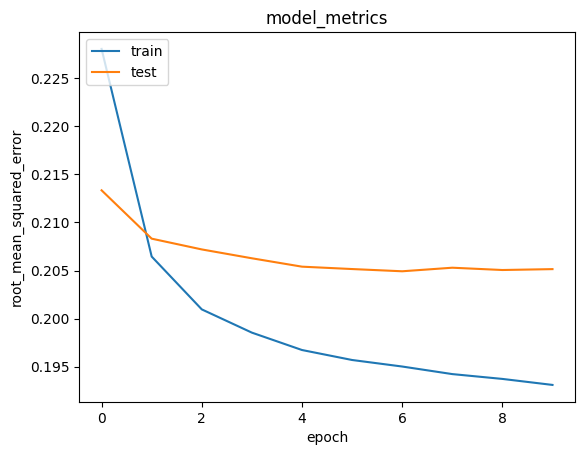

In [96]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##Mendapatkan Rekomendasi Movie

In [97]:
movie_df = data_fix
df = pd.read_csv('/content/ratings_small.csv')

# Mengambil sample user
user_id = df.userId.sample(1).iloc[0]
movie_watched_by_user = df[df.userId == user_id]

movie_not_watched = movie_df[~movie_df['id'].isin(movie_watched_by_user.movieId.values)]['id']
movie_not_watched = list(
    set(movie_not_watched)
    .intersection(set(movie_to_movie_encoded.keys()))
)

movie_not_watched = [[movie_to_movie_encoded.get(x)] for x in movie_not_watched]
user_encoder = df['userId'].get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_watched), movie_not_watched)
)

In [102]:
ratings = model.predict(user_movie_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_watched[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Movie with high ratings from user')
print('----' * 8)

top_movie_user = (
    movie_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)

movie_df_rows = movie_df[movie_df['id'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.title)

print('----' * 8)
print('Top 10 movie recommendation')
print('----' * 8)

recommended_movie = movie_df[movie_df['id'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.title)

48/48 [==============================] - 0s 4ms/step
Showing recommendations for users: 175
Movie with high ratings from user
--------------------------------
Terminator 3: Rise of the Machines
--------------------------------
Top 10 movie recommendation
--------------------------------
Nick of Time
L.A. Confidential
The Breakfast Club
Sister Act
Ghost Dog: The Way of the Samurai
Amélie
A Bridge Too Far
Hairspray
Michael Clayton
Southland Tales
